## Project Presentation : Machine Learning and Deep Learning Techniques in Network Intrusion Detection
####                                                                        Aakash Chowdhury
####                                                                        February 17, 2022                                 

### Keywords about Network Intrusion Detection:

 * **Intrusion** can be defined as some unauthorised activities that cause damage to an information system.  
 * Cyber-attacks are becoming more sophisticated and evolution of malicious sotware(malware) presenting challenges in accurately detecting intrusions.
 * An **Intrusion Detection System(IDS)** is to identify different kinds of malicious network traffic and computer usage, which cannot be identified by a traditional firewall.    
 * In **Anomaly-based Intrusion Detection System(AIDS)**, a normal model of the behavior of a computer system is create using machine learning, statistical-based or knowledge-based methods. Any significant deviation between observed behavior and the model is regarded as an anomoly or intrusion.

### An Overview of Data :
* The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes. 
  * For each TCP/IP connection, **41** quantitative and qualitative features are obtained from normal and attack data            (3 qualitative and 38 quantitative features). The **class variable**(decision vector) has two categories: **normal** and **anomalous**. 
  * The data has been collected from the kaggle page  <a href="https://www.kaggle.com/sampadab17/network-intrusion-detection" target="_blank">link</a>

### Learning Task:
* My **learning task** is to build a suitable anomaly detector or an adequate binary classifier, which can classify anomaly. To serve the purpose, I'd like to investigate the common classification algorithms like **Logistic Regression**, **K-Nearest Neighbors**, **Support Vector Machines** and **Artificial Neural Network** to  accomplish this.
* To measure the performances following two methods has been used.
    * **Log loss** or **cross-entropy loss:** 
        $L_{\log}(y,p) = -(y\log(p) + (1-y)\log(1-p)) $
    * **Accuracy measure:**
         $\text{accuracy}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} 1(\hat{y}_i = y_i) $ 
    * **Confusion metric** also be computed for visualisation.      
        
    
    

### Review of Literature: 
I have considerd two specific papers for my project:
 * "Classification Techniques for Intrusion Detection An Overview". <a href="file:///C:/Users/choaak/AppData/Local/Temp/Classification_Techniques_for_Intrusion_Detection_.pdf" target="_blank">link1</a>
 * "Survey of intrusion detection systems: techniques, datasets and challenges". <a href="https://cybersecurity.springeropen.com/track/pdf/10.1186/s42400-019-0038-7.pdf" target="_blank">link2</a>


In [3]:
# some initialization stuff
#%run init.py
#%matplotlib inlinefrom sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import tensorflow.keras.initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

#For having a look at the data before starting the analysis
#print(np.shape(test)) To know the shape of the data
#np.shape(train)
train.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [4]:
train.dtypes
#test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Preliminary Data Analysis:
* **Encoding Categorical Features:**
     As it is noticible from the data type of the train dataset that 4 variables(3 features and 1 decision vector) are of object type. So, our first task is to convert them into **numeric** so that they can be considered for machine learning or deep learning model inputs. 
* **Standardize the data:** Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. 



In [5]:
#Label Encoding 
train["protocol_type" ] = train["protocol_type"].astype('category')
train["service" ] = train["service"].astype('category')
train["flag" ] = train["flag"].astype('category')
train["class" ] = train["class"].astype('category')
#-----------------------------------------------------------------------
train["protocol_type"] = train["protocol_type"].cat.codes
train["service" ] = train["service"].cat.codes
train["flag" ] = train["flag"].cat.codes
train["class" ] = train["class"].cat.codes
train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1


In [6]:
array = train.values 
print(np.shape(array))
##Vector explanatory variables/input vector
X_train = array[:,0:41]
Y = np.array([(1-x) for x in array[:,41]])
Y = Y.astype(int)
X_test = test.values
print(np.shape(X_train)) 
print(Y)
#Standardize/Normalize the data--------------------------------
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])  

(25192, 42)
(25192, 41)
[0 0 1 ... 1 1 1]
[[-0.114 -0.126 -0.645  0.753 -0.01  -0.039 -0.009 -0.091 -0.006 -0.092
  -0.026 -0.808 -0.022 -0.039 -0.028 -0.022 -0.028 -0.019 -0.044  0.
   0.    -0.096 -0.72  -0.355 -0.64  -0.634 -0.372 -0.373  0.772 -0.349
  -0.374 -0.329 -0.814 -0.779 -0.281  0.073 -0.288 -0.642 -0.627 -0.222
  -0.374]
 [-0.114  2.216  0.769  0.753 -0.01  -0.039 -0.009 -0.091 -0.006 -0.092
  -0.026 -0.808 -0.022 -0.039 -0.028 -0.022 -0.028 -0.019 -0.044  0.
   0.    -0.096 -0.624 -0.368 -0.64  -0.634 -0.372 -0.373 -1.321  0.491
  -0.374  0.732 -1.031 -1.158  2.764  2.376 -0.288 -0.642 -0.627 -0.385
  -0.374]
 [-0.114 -0.126  1.09  -0.74  -0.01  -0.039 -0.009 -0.091 -0.006 -0.092
  -0.026 -0.808 -0.022 -0.039 -0.028 -0.022 -0.028 -0.019 -0.044  0.
   0.    -0.096  0.335 -0.299  1.595  1.6   -0.372 -0.373 -1.389  0.043
  -0.374  0.732 -0.805 -0.935 -0.174 -0.478 -0.288  1.604  1.614 -0.385
  -0.374]
 [-0.114 -0.126 -0.453  0.753 -0.01   0.052 -0.009 -0.091 -0.006 -0.092
 

In [61]:
test.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0


### Splitting Train data:
* It can be clearly observable that the test data doesnot have the the column of decison variable(class variable). Therefore, it is necessary to split our train data for model validation/performance checking purposes. For my implementation, I have considered **2:1** ratio for train(67%) and test(33%) respectively. After Spliting, i have got the following data structure for train and test data.   
* For application of this method I have considered following sklearn page **https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html**.

In [7]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16878, 41) (8314, 41) (16878,) (8314,)


### Implementing Multi-feature Logistic Regression:

* The first method that I have implemented on the training set is the **multivariate logistic regression**. I didnot impose the usual statistical logistic regression model rather than I have implemented the machine learning based approach, where **gradient descent algorithm** has been applied to determine the coeffcients of the model. 
* Logistic regression is the quiet common method that has been used to calculate the probability of the individual corresponding to two classes, so that it can be possible to conclude where the individual should be classified.  


In [62]:
#Implementing Logistic regression by machine learning approavh for binary classification-------------------
#Consider all the methods-----------------------------------------------------
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 10000)
clf = GridSearchCV(logreg, params, cv=5)
# fit the model with data-------------------------------------
clf.fit(X_train,y_train, sample_weight= np.random.uniform(0,1, len(y_train)))
##Check Comparison of Scores---------------------------------
scores = clf.cv_results_['mean_test_score']
for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.956
  newton-cg 0.956
  lbfgs 0.956
  sag 0.956
  saga 0.955


In [62]:
#Predicted values and probabilities------------------------------------
Y_pred_log = clf.predict(X_test)
pred_probabilities = clf.predict_proba(X_test)

# Evaluation of the prediction
print("The binary cross entropy loss is : {}".format(metrics.log_loss(y_test, pred_probabilities)))
print("The accuracy score is : {}".format(metrics.accuracy_score(y_test,Y_pred_log)))
#Confusion matrix----------------------------------------
cnf_matrix1 = metrics.confusion_matrix(y_test, Y_pred_log)
cnf_matrix1

The binary cross entropy loss is : 0.11882140342150943
The accuracy score is : 0.9568198219870099


array([[4324,  137],
       [ 222, 3631]], dtype=int64)

### Support Vector Machine(SVM):
* SVM is a disciminative classifier defined by splitting **hyperplane**.
* SVMs use a **kernal** function to map the training data into a higher dimensioned space so that the intrusion is **linearly** classified.
* In IDS datasets, many features are redundant or less influential in separating data points into correct classes. Therfore **features selection** should be considered in SVM training. 

In [60]:
#Implementation of Support Vector Machine-------------------------------------------------------

#Feature Selection------------------------------------------------------------------------------
fs = SelectKBest(score_func=mutual_info_classif, k = 30)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

#By using sigmoid kernal------------------------------------------------------------------------
clf_svm = svm.SVC(kernel='sigmoid',coef0= 0, probability=True)
clf_svm.fit(X_train_fs,y_train, sample_weight= np.random.uniform(0,1, len(y_train)))
y_pred_svm = clf_svm.predict(X_test_fs)
pred_prob_svm = clf_svm.predict_proba(X_test_fs)
#-----------------------------------------------------------------------------------------------
#clf_svm = svm.SVC(kernel='sigmoid',coef0= 0, probability=True)
#clf_svm.fit(X_train,y_train, sample_weight= np.random.uniform(0,1, len(y_train)))
#y_pred_svm = clf_svm.predict(X_test)
#pred_prob_svm = clf_svm.predict_proba(X_test)


print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred_svm))
print("The binary cross entropy loss is : %f" % metrics.log_loss(y_test, pred_prob_svm))
print("confusion matrix is: \n" ,metrics.confusion_matrix(y_test, y_pred_svm))

Accuracy of svm: 0.8468847726726004
The binary cross entropy loss is : 0.575747
confusion matrix is: 
 [[3749  647]
 [ 626 3292]]


### k-Nearest Neighbor Classifier (k-NN classifier):
* Typical Non-parametric classification technique.
* The idea of this technique is to name an unlabelled data sample to the class of its k nearest neighbors.

In [10]:
#Implementation of KNN Classification-----------------------------------------------------------
error=[]
loss=[]
for i in tqdm(range(1, 40)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_prob_i = knn.predict_proba(X_test)
    error.append(np.mean(pred_i != y_test))
    loss.append(metrics.log_loss(y_test, pred_prob_i))

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [02:45<00:00,  4.25s/it]


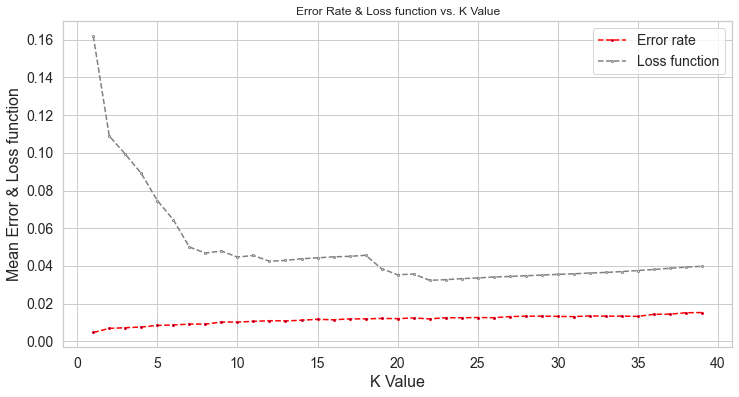

In [11]:
#Plot error rate and loss function for K-Nearest Neighbor method --------------------------------------------
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=2, label = 'Error rate')
ax.plot(range(1, 40), loss, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='white', markersize=2 , label = 'Loss function')
plt.title('Error Rate & Loss function vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error & Loss function')
ax.legend()
plt.show()

In [9]:
#Final KNN classifier outcome-------------------------------------------------------------
classifier = KNeighborsClassifier(n_neighbors = 22)
classifier.fit(X_train, y_train)
Y_pred_KNN = classifier.predict(X_test)
cnf_matrix2 = metrics.confusion_matrix(y_test, Y_pred_KNN)
print(cnf_matrix2)
pred_prob = classifier.predict_proba(X_test)
print("The binary cross entropy loss is : %f" % metrics.log_loss(y_test, pred_prob))
print("The accuracy score is : {}".format(metrics.accuracy_score(y_test,Y_pred_KNN)))

[[4353   38]
 [  61 3862]]
The binary cross entropy loss is : 0.032381
The accuracy score is : 0.9880923743083955


### Artificial Neural Network (ANN):
Artificial neural Network is quiet a poular machine learning and deep learning methods which has been shown to be successful in detecting different malware.

In [63]:
#Implementation Multi Layer Artificial Neural Network-----------------------------------------
initializer1 = tensorflow.keras.initializers.RandomNormal(mean=0., stddev=1.) #initialize the weights
initializer2 = tensorflow.keras.initializers.RandomUniform(minval=0., maxval=1.)
def A_NN(epoch , NN1, NN2 , actv_final, c_metric):
    
    # determine the number of input features
    n_features = X_train.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(NN1, activation='relu', kernel_initializer= initializer1, input_shape=(n_features,)))
    model.add(Dense(NN2, activation='relu', kernel_initializer= initializer1 ))
    model.add(Dense(1, activation= actv_final))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # fit the model
    model.fit(X_train, y_train, epochs= epoch, batch_size=32, verbose=0)
    # Test the model after training
    if c_metric == False:
        test_results = model.evaluate(X_test, y_test, verbose=1)
        return test_results
    if c_metric == True:
        predictions = model.predict(X_test)
        prediction_classes = [ 1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
        cm = metrics.confusion_matrix(y_test, prediction_classes)
        return cm

In [ ]:
for epoch in tqdm(range(5,100,5)):
    for NN1 in range(5,30,4):
        for NN2 in range(5,30,4):
                print("epoch value = {}, NN1={} NN2={}".format(epoch, NN1, NN2))
                A_NN(epoch , NN1, NN2 , 'sigmoid')
                A_NN(epoch , NN1, NN2 , 'tanh')

In [10]:
#Computing error rate and binary loss of cross entropy for different epoch values -------------------------------
NN1 = 8
NN2 = 8
A_NN_S = []
A_NN_T = []
for epoch in tqdm(range(5,100,5)):
                print("epoch value = {}".format(epoch, NN1, NN2))
                A_NN_S.append(A_NN(epoch , NN1, NN2 , 'sigmoid',c_metric = False))
                A_NN_T.append(A_NN(epoch , NN1, NN2 , 'tanh',c_metric = False))

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

epoch value = 5
8314/8314 [==============================] - 0s 22us/sample - loss: 6.0772 - accuracy: 0.5849


  5%|████▎                                                                              | 1/19 [00:04<01:24,  4.67s/it]

epoch value = 10
8314/8314 [==============================] - 0s 21us/sample - loss: 0.8509 - accuracy: 0.9265


 11%|████████▋                                                                          | 2/19 [00:12<01:49,  6.46s/it]

epoch value = 15
8314/8314 [==============================] - 0s 21us/sample - loss: 0.6747 - accuracy: 0.9436


 16%|█████████████                                                                      | 3/19 [00:23<02:16,  8.54s/it]

epoch value = 20
8314/8314 [==============================] - 0s 21us/sample - loss: 0.3764 - accuracy: 0.9631


 21%|█████████████████▍                                                                 | 4/19 [00:37<02:41, 10.80s/it]

epoch value = 25
8314/8314 [==============================] - 0s 20us/sample - loss: 1.3183 - accuracy: 0.9128


 26%|█████████████████████▊                                                             | 5/19 [00:55<03:04, 13.19s/it]

epoch value = 30
8314/8314 [==============================] - 0s 21us/sample - loss: 0.9757 - accuracy: 0.9328


 32%|██████████████████████████▏                                                        | 6/19 [01:16<03:26, 15.85s/it]

epoch value = 35
8314/8314 [==============================] - 0s 21us/sample - loss: 0.3662 - accuracy: 0.9719


 37%|██████████████████████████████▌                                                    | 7/19 [01:40<03:42, 18.57s/it]

epoch value = 40
8314/8314 [==============================] - 0s 21us/sample - loss: 0.2369 - accuracy: 0.9767


 42%|██████████████████████████████████▉                                                | 8/19 [02:07<03:55, 21.41s/it]

epoch value = 45
8314/8314 [==============================] - 0s 21us/sample - loss: 0.4515 - accuracy: 0.9673


 47%|███████████████████████████████████████▎                                           | 9/19 [02:38<04:02, 24.28s/it]

epoch value = 50
8314/8314 [==============================] - 0s 21us/sample - loss: 0.1139 - accuracy: 0.9822


 53%|███████████████████████████████████████████▏                                      | 10/19 [03:13<04:08, 27.56s/it]

epoch value = 55
8314/8314 [==============================] - 0s 20us/sample - loss: 7.1893 - accuracy: 0.5339


 58%|███████████████████████████████████████████████▍                                  | 11/19 [03:50<04:04, 30.58s/it]

epoch value = 60
8314/8314 [==============================] - 0s 22us/sample - loss: 0.3689 - accuracy: 0.9727


 63%|███████████████████████████████████████████████████▊                              | 12/19 [04:31<03:55, 33.64s/it]

epoch value = 65
8314/8314 [==============================] - 0s 21us/sample - loss: 0.1547 - accuracy: 0.9850


 68%|████████████████████████████████████████████████████████                          | 13/19 [05:15<03:40, 36.77s/it]

epoch value = 70
8314/8314 [==============================] - 0s 20us/sample - loss: 0.2640 - accuracy: 0.9765


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [06:04<03:21, 40.39s/it]

epoch value = 75
8314/8314 [==============================] - 0s 20us/sample - loss: 1.1599 - accuracy: 0.9234


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [06:54<02:54, 43.56s/it]

epoch value = 80
8314/8314 [==============================] - 0s 21us/sample - loss: 0.1839 - accuracy: 0.9840


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [07:48<02:19, 46.66s/it]

epoch value = 85
8314/8314 [==============================] - 0s 35us/sample - loss: 0.1173 - accuracy: 0.9844


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [08:47<01:40, 50.42s/it]

epoch value = 90
8314/8314 [==============================] - 0s 20us/sample - loss: 0.1146 - accuracy: 0.9859


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [09:51<00:54, 54.46s/it]

epoch value = 95
8314/8314 [==============================] - 0s 21us/sample - loss: 0.3091 - accuracy: 0.9782


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [10:57<00:00, 34.59s/it]


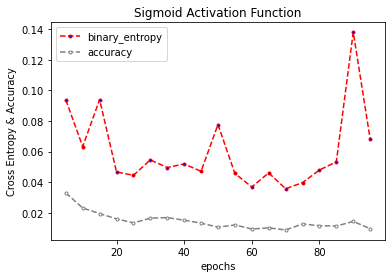

In [23]:
fig = plt.figure()
ax = plt.axes()  

ax.plot( list(range(5,100,5)) , [ A_NN_S[i][0] for i in range(len(A_NN_S))] ,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=3, label = 'binary_entropy')
ax.plot( list(range(5,100,5)) , [(1 - A_NN_S[i][1]) for i in range(len(A_NN_S))] ,color='grey', linestyle='dashed', marker='o',
         markerfacecolor='white', markersize=3, label = 'accuracy')
plt.title('Sigmoid Activation Function')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy & Accuracy')
ax.legend()
plt.show()

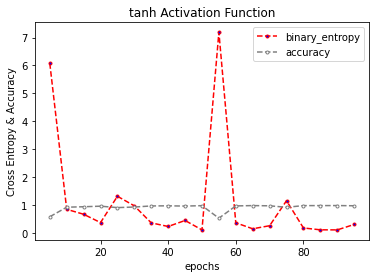

In [19]:
fig = plt.figure()
ax = plt.axes()       
ax.plot( list(range(5,100,5)) , [A_NN_T[i][0] for i in range(len(A_NN_T))] ,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=3, label = 'binary_entropy')
ax.plot( list(range(5,100,5)) , [A_NN_T[i][1] for i in range(len(A_NN_T))] ,color='grey', linestyle='dashed', marker='o',
         markerfacecolor='white', markersize=3, label = 'accuracy')
plt.title('tanh Activation Function')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy & Accuracy')
ax.legend()
plt.show()

In [24]:
test_res1 = A_NN(60, 8, 8, 'sigmoid',c_metric = False)
test_res2 = A_NN(200,20, 20, 'tanh',c_metric = False)


8314/8314 [==============================] - 0s 21us/sample - loss: 0.2836 - accuracy: 0.9792


In [64]:
A_NN(60, 8, 8, 'sigmoid', c_metric = True )

array([[4373,   66],
       [  39, 3836]], dtype=int64)

In [65]:
A_NN(200,20, 20, 'tanh',  c_metric = True )

array([[4413,   26],
       [ 164, 3711]], dtype=int64)

### Conclusion:
* After implementation of the four underlined methods, it has been found that k-NN classfier and A-NN perform relatively better than the SVM and logistic regression classifier both in terms of cross entropy loss and the accuracy for the given data. 
* In ANN method **sigmoid** activation function performs better than **tanh** both in terms of convergence stability and the performance mesaures for diffrent values of multilayer neurons and epochs. 

### Further/Future Research Direction:
* We have to check the accuracy of our models into different data and can mesaure robustness of the models.
* We can also add another two popular statistical learning methods with these four. viz. **Decision trees** and **Hidden Markov model** 
* Also i would like to investigate the application of Convolution Neural Network(CNN) in different time series or sequential Network Intrusion Dataset.